# Исследование объявлений о продаже квартир
**Описание проекта**

В вашем распоряжении данные сервиса Яндекс Недвижимость — архив объявлений о продаже квартир в Санкт-Петербурге и соседних населённых пунктах за несколько лет. Вам нужно научиться определять рыночную стоимость объектов недвижимости. Для этого проведите исследовательский анализ данных и установите параметры, влияющие на цену объектов. Это позволит построить автоматизированную систему: она отследит аномалии и мошенническую деятельность.

По каждой квартире на продажу доступны два вида данных. Первые вписаны пользователем, вторые — получены автоматически на основе картографических данных. Например, расстояние до центра, аэропорта и других объектов — эти данные автоматически получены из геосервисов. Количество парков и водоёмов также заполняется без участия пользователя.

**Описание данных**

•	airports_nearest — расстояние до ближайшего аэропорта в метрах (м)

•	balcony — число балконов

•	ceiling_height — высота потолков (м)

•	cityCenters_nearest — расстояние до центра города (м)

•	days_exposition — сколько дней было размещено объявление (от публикации до снятия)

•	first_day_exposition — дата публикации

•	floor — этаж

•	floors_total — всего этажей в доме

•	is_apartment — апартаменты (булев тип)

•	kitchen_area — площадь кухни в квадратных метрах (м²)

•	last_price — цена на момент снятия с публикации

•	living_area — жилая площадь в квадратных метрах (м²)

•	locality_name — название населённого пункта

•	open_plan — свободная планировка (булев тип)

•	parks_around3000 — число парков в радиусе 3 км

•	parks_nearest — расстояние до ближайшего парка (м)

•	ponds_around3000 — число водоёмов в радиусе 3 км

•	ponds_nearest — расстояние до ближайшего водоёма (м)

•	rooms — число комнат

•	studio — квартира-студия (булев тип)

•	total_area — общая площадь квартиры в квадратных метрах (м²)

•	total_images — число фотографий квартиры в объявлении

**Порядок исследования**

    1) Получим и сделаем первоначальное исследование данных
    
    2) Выполним предобработку данных (поиск дубликатов, пропусков, аномалий, исправление и удаление данных)
    
    3) Добавим в датасет новые данные:
        - цена квадратного метра; день недели, месяц и год публикации объявления; 
        - этаж квартиры; варианты — первый, последний, другой; 
        - соотношение жилой и общей площади, а также отношение площади кухни к общей.
        
    4) Проведём исследовательский анализ:
        - анализ всего датасета, выявление зависимости цены от показателей квартиры;
        - анализ квартир, находящихся в центре Санкт-Петербурга.
        
    5) Сделаем выводы и ответим на вопросы:
        - сколько времени занимает продажа квартиры. Когда продажу можно назвать быстрой / долгой;
        - какие факторы больше всего влияют на стоимость квартиры;
        - какая средняя стоимость квартиры в 10 населённых пунктов с наибольшим числом объявлений;
        - какие факторы влияют на стоимость квартиры в центре Санкт-Петербурга. Насколько они отличаются от данных в целом по городу.

### Откроем файл с данными и изучим общую информацию

In [1]:
# Установим модуль phik для визуализации данных
! pip install phik

In [2]:
import pandas as pd
import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt

import phik
from phik.report import plot_correlation_matrix
from phik import report

data = pd.read_csv('/datasets/real_estate_data.csv', sep='\t')
data.head()

,total_images,last_price,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor,is_apartment,...,kitchen_area,balcony,locality_name,airports_nearest,cityCenters_nearest,parks_around3000,parks_nearest,ponds_around3000,ponds_nearest,days_exposition
0,20,13000000.0,108.0,2019-03-07T00:00:00,3,2.70,16.0,51.0,8,NaN,...,25.0,NaN,Санкт-Петербург,18863.0,16028.0,1.0,482.0,2.0,755.0,NaN
1,7,3350000.0,40.4,2018-12-04T00:00:00,1,NaN,11.0,18.6,1,NaN,...,11.0,2.0,посёлок Шушары,12817.0,18603.0,0.0,NaN,0.0,NaN,81.0
2,10,5196000.0,56.0,2015-08-20T00:00:00,2,NaN,5.0,34.3,4,NaN,...,8.3,0.0,Санкт-Петербург,21741.0,13933.0,1.0,90.0,2.0,574.0,558.0
3,0,64900000.0,159.0,2015-07-24T00:00:00,3,NaN,14.0,NaN,9,NaN,...,NaN,0.0,Санкт-Петербург,28098.0,6800.0,2.0,84.0,3.0,234.0,424.0
4,2,10000000.0,100.0,2018-06-19T00:00:00,2,3.03,14.0,32.0,13,NaN,...,41.0,NaN,Санкт-Петербург,31856.0,8098.0,2.0,112.0,1.0,48.0,121.0


In [3]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 23699 entries, 0 to 23698
Data columns (total 22 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   total_images          23699 non-null  int64  
 1   last_price            23699 non-null  float64
 2   total_area            23699 non-null  float64
 3   first_day_exposition  23699 non-null  object 
 4   rooms                 23699 non-null  int64  
 5   ceiling_height        14504 non-null  float64
 6   floors_total          23613 non-null  float64
 7   living_area           21796 non-null  float64
 8   floor                 23699 non-null  int64  
 9   is_apartment          2775 non-null   object 
 10  studio                23699 non-null  bool   
 11  open_plan             23699 non-null  bool   
 12  kitchen_area          21421 non-null  float64
 13  balcony               12180 non-null  float64
 14  locality_name         23650 non-null  object 
 15  airports_nearest   

In [4]:
len(data)

23699

In [5]:
data.columns

Index(['total_images', 'last_price', 'total_area', 'first_day_exposition',
       'rooms', 'ceiling_height', 'floors_total', 'living_area', 'floor',
       'is_apartment', 'studio', 'open_plan', 'kitchen_area', 'balcony',
       'locality_name', 'airports_nearest', 'cityCenters_nearest',
       'parks_around3000', 'parks_nearest', 'ponds_around3000',
       'ponds_nearest', 'days_exposition'],
      dtype='object')

In [6]:
data.describe().T

,count,mean,std,min,25%,50%,75%,max
total_images,23699.0,9.858475e+00,5.682529e+00,0.0,6.00,9.00,14.0,50.0
last_price,23699.0,6.541549e+06,1.088701e+07,12190.0,3400000.00,4650000.00,6800000.0,763000000.0
total_area,23699.0,6.034865e+01,3.565408e+01,12.0,40.00,52.00,69.9,900.0
rooms,23699.0,2.070636e+00,1.078405e+00,0.0,1.00,2.00,3.0,19.0
ceiling_height,14504.0,2.771499e+00,1.261056e+00,1.0,2.52,2.65,2.8,100.0
floors_total,23613.0,1.067382e+01,6.597173e+00,1.0,5.00,9.00,16.0,60.0
living_area,21796.0,3.445785e+01,2.203045e+01,2.0,18.60,30.00,42.3,409.7
floor,23699.0,5.892358e+00,4.885249e+00,1.0,2.00,4.00,8.0,33.0
kitchen_area,21421.0,1.056981e+01,5.905438e+00,1.3,7.00,9.10,12.0,112.0
balcony,12180.0,1.150082e+00,1.071300e+00,0.0,0.00,1.00,2.0,5.0


In [7]:
data.duplicated().sum()

0

In [8]:
data.isna().sum().sort_values()

total_images                0
open_plan                   0
floor                       0
rooms                       0
studio                      0
total_area                  0
last_price                  0
first_day_exposition        0
locality_name              49
floors_total               86
living_area              1903
kitchen_area             2278
days_exposition          3181
ponds_around3000         5518
parks_around3000         5518
cityCenters_nearest      5519
airports_nearest         5542
ceiling_height           9195
balcony                 11519
ponds_nearest           14589
parks_nearest           15620
is_apartment            20924
dtype: int64

**Возможные причины пропусков:**

    - Владелец мог не указать данные, если параметр отсутствует у квартиры
    - Владелец мог внести символ, который не был считан системой сбора данных
    - Просто ошибка составителя таблицы
    - Повреждение данных при переносе

In [9]:
data.isna().mean().sort_values(ascending=False)*100 #процент пропусков от всего датасета

is_apartment            88.290645
parks_nearest           65.909954
ponds_nearest           61.559559
balcony                 48.605426
ceiling_height          38.799105
airports_nearest        23.384953
cityCenters_nearest     23.287902
ponds_around3000        23.283683
parks_around3000        23.283683
days_exposition         13.422507
kitchen_area             9.612220
living_area              8.029875
floors_total             0.362885
locality_name            0.206760
total_images             0.000000
last_price               0.000000
studio                   0.000000
floor                    0.000000
rooms                    0.000000
first_day_exposition     0.000000
total_area               0.000000
open_plan                0.000000
dtype: float64

**В 14 столбцах из 22 присутствуют пропуски:**

**ceiling_height:** 9195 пропусков. Почти 40% объявлений не имеют информацию о высоте потолков. Данные по этому столбцу для нашего исследования не так важны. Но, следует принять, что для более чем трети объектов он не указан. Пропуски поправим позже, хотя это и не обязательно.

**floors_total:** 86 пропусков. Это треть процента, на исследование не повлияют. Пропуски поправим позже для чистоты эксперимента, хотя это и не обязательно.

**living_area:** 1903 пропуска. Вероятно, пользователи не помнят точную площадь, поэтому не пишут ее или же владельцы квартир небольшого размера не хотят акцентировать на этом внимание, либо произошёл технический сбой и данные не были добавлены автоматизированной системой. Кол-во пропусков 8%, но данные по этому столбцу нужны нам для исследования. Пропуски поправим позже для чистоты эксперимента.

**is_apartment:** 20924 пропусков. Вероятно, пользователи часто не указывают тип недвижимости, если он просто жилой. Т.к. в этом столбце булев тип данных, пропуски можно заменить на False.

**kitchen_area:** 2278 пропусков, а это почти 10%. Вероятно, пользователи не указывают точный метраж кухни, т.к. не знают его. Нам важны эти данные для исследования. Заполнить значения нечем, оставим пропуски. Пропуски поправим позже для чистоты эксперимента.

**balcony:** 11519 пропусков. Вероятно, пользователи при отсутствии балконов их не указывают. В таком случае заменим пропуски нулями.

**locality_name:** 49 пропусков. Кол-во пропусков мало, на исследование не повлияют, оставим пропуски.

**airports_nearest:** 5542 пропусков. Вероятно, пропуски возникли в связи с отсутствием информации на картографических данных. Хоть это и 23% данных, но так как они не влияют на исследование, ведь если покупателю будет необходима квартира поближе к аэропорту, он это итак увидит на карте платформы по продаже квартиры. Поэтому пропуски оставим.

**city_centers_nearest:** 5519 пропусков. Вероятно, пропуски возникли в связи с отсутствием информации на картографических данных. Пропуски в столбце на исследование не повлияют. Поэтому пропуски оставим по аналогии с предыдущим пунктом. Если будет необходимо, покупатель увидит местоположение объекта на карте платформы продажи или выяснит по телефону.

**parks_around_3000:** 5518 пропусков. Число пропусков совпадает с числом пропусков в ponds_around_3000, что подозрительно. Возможно, для этих объектов не была получена информация на основе картографических данных. Пропуски в столбце на задачи исследования не влияют, оставим их по аналогии с пунктами выше.

**parks_nearest:** 15620 пропусков. Более половины объектов не имеют информации о ближайшем парке. Скорее всего, информация на основе картографических данных не была получена. Пропуски в столбце на задачи исследования не влияют, оставим их по аналогии с пунктами выше.

**ponds_around_3000:** 5518 пропусков. Число совпадает с числом пропусков parks_around_3000, что выглядит подозрительно. Скорее всего, для этих объектов не была получена информация на основе картографических данных. Пропуски в столбце на исследование не влияют, оставим их по аналогии с пунктами выше.

**ponds_nearest:** 14589 пропусков. Больше половины объектов не имеют информации о ближайшем парке. Скорее всего, информация на основе картографических данных не была получена. Пропуски в столбце на задачи исследования не влияют, оставим их по аналогии с пунктами выше.

**days_exposition:** 3181 пропусков. 13,5% объявлений не содержат информации о количестве дней размещения объявления, подозрительно, т.к. эти данные должны быть получены автоматически. Возможно, это техническая ошибка, которая произошла в момент сбора/выгрузки данных. Данные этого столбца важны для исследования. Заполнить значения нечем, оставим пропуски.

array([[<AxesSubplot:title={'center':'total_images'}>,
        <AxesSubplot:title={'center':'last_price'}>,
        <AxesSubplot:title={'center':'total_area'}>,
        <AxesSubplot:title={'center':'rooms'}>],
       [<AxesSubplot:title={'center':'ceiling_height'}>,
        <AxesSubplot:title={'center':'floors_total'}>,
        <AxesSubplot:title={'center':'living_area'}>,
        <AxesSubplot:title={'center':'floor'}>],
       [<AxesSubplot:title={'center':'kitchen_area'}>,
        <AxesSubplot:title={'center':'balcony'}>,
        <AxesSubplot:title={'center':'airports_nearest'}>,
        <AxesSubplot:title={'center':'cityCenters_nearest'}>],
       [<AxesSubplot:title={'center':'parks_around3000'}>,
        <AxesSubplot:title={'center':'parks_nearest'}>,
        <AxesSubplot:title={'center':'ponds_around3000'}>,
        <AxesSubplot:title={'center':'ponds_nearest'}>],
       [<AxesSubplot:title={'center':'days_exposition'}>, <AxesSubplot:>,
        <AxesSubplot:>, <AxesSubplot:>]], d

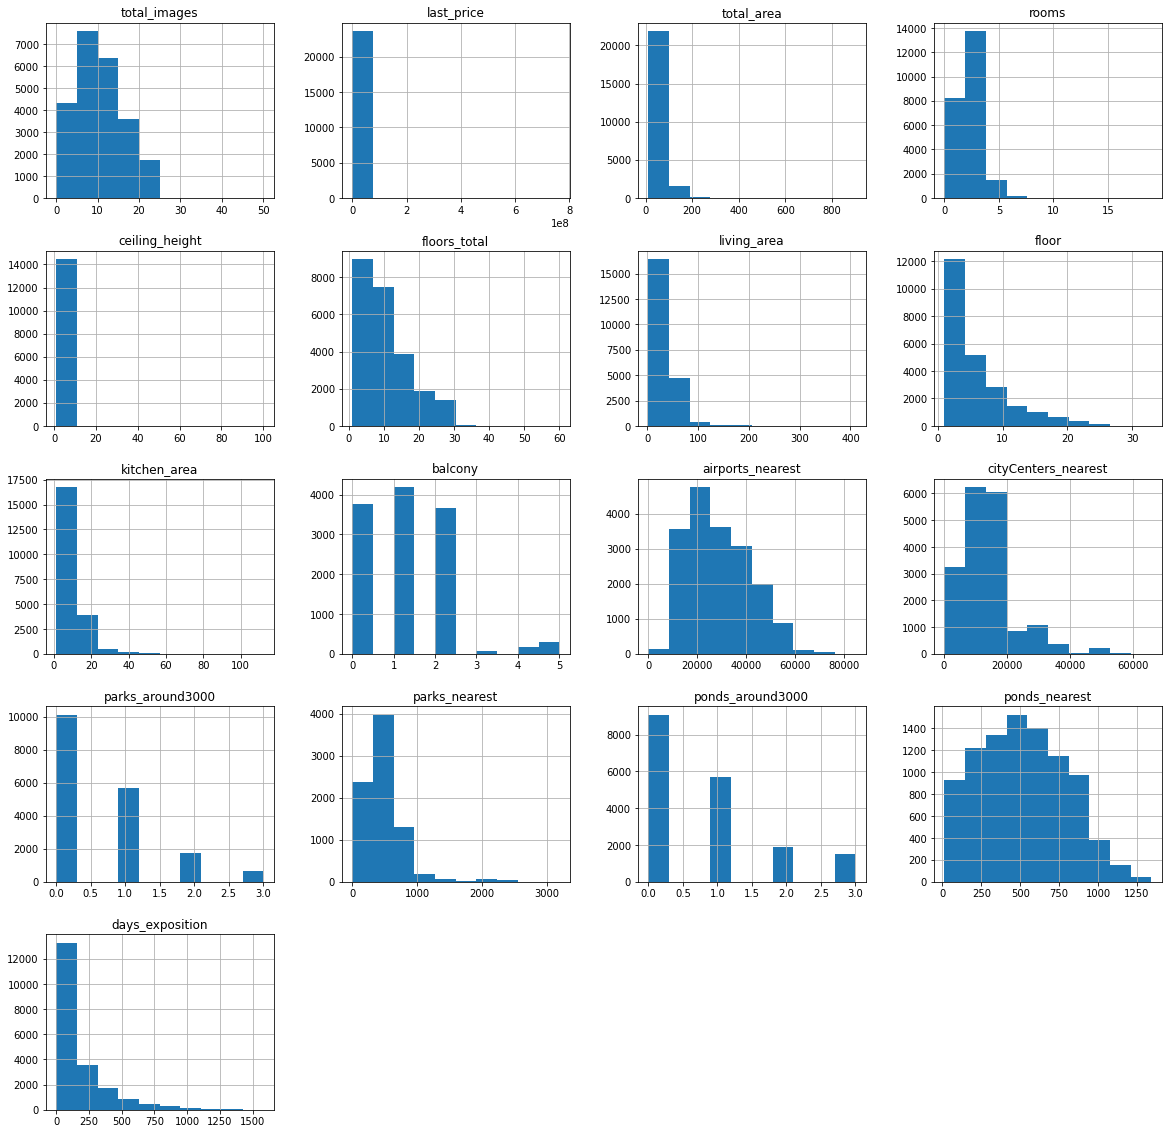

In [10]:
# Построим матрицу гистограмм для наших данных
data.hist(figsize=(20, 20))

### Выполним предобработку данных

In [11]:
# Создаём функцию заполнения пропусков кастомным значением
def fillna_custom_function(column, value):
    return data[column].fillna(value=value).astype(int)

In [12]:
data['is_apartment'].isna().sum()

20924

In [13]:
# Приводим в целочисленный тип стоимость квартиры
data['last_price'] = data['last_price'].astype(int)

In [14]:
# Приводим к типу даты дату публикации
data['first_day_exposition'] = pd.to_datetime(data['first_day_exposition'], format='%Y-%m-%dT%H:%M:%S')

*Выясняем количество значений в аппартаментах. Всего аппартаменты - 50. Заменяем пропущенные значения на нет, так как в столбце булевы значения*

In [15]:
data['is_apartment'] = data['is_apartment'].fillna(value=False)

*Приводим в целочисленный тип количество балконов. Заменяем пропущенные значения на 0, чтобы убрать пропуски и так как значение не влияет на наше исследование*

In [16]:
data['balcony'] = fillna_custom_function('balcony', 0)

*Приводим в целочисленный тип количество парков. Заменяем пропущенные значения на 0, чтобы убрать пропуски и так как значение не влияет на наше исследование*

In [17]:
data['parks_around3000'] = fillna_custom_function('parks_around3000', 0)

*Приводим в целочисленный тип количество прудов. Заменяем пропущенные значения на 0, чтобы убрать пропуски и так как значение не влияет на наше исследование*

In [18]:
data['ponds_around3000'] = fillna_custom_function('ponds_around3000', 0)

Проверяем, что пропусков не осталось и данные не потерялись

In [19]:
data['last_price'].head().unique()

array([13000000,  3350000,  5196000, 64900000, 10000000])

In [20]:
display(data['first_day_exposition'].head())

0   2019-03-07
1   2018-12-04
2   2015-08-20
3   2015-07-24
4   2018-06-19
Name: first_day_exposition, dtype: datetime64[ns]

In [21]:
data['is_apartment'].isna().sum()

0

In [22]:
data['is_apartment'].unique()

array([False,  True])

In [23]:
data['balcony'].isna().sum()

0

In [24]:
data['balcony'].unique()

array([0, 2, 1, 5, 4, 3])

In [25]:
data['ponds_around3000'].isna().sum()

0

In [26]:
data['ponds_around3000'].unique()

array([2, 0, 3, 1])

In [27]:
data['parks_around3000'].isna().sum()

0

In [28]:
data['parks_around3000'].unique()

array([1, 0, 2, 3])

Создадим функцию заполнения данных медианным значением, потому что медиана игнорирует или же сглаживает случайные или не случайные выбросы, шум и катаклизмы в целом.

In [29]:
def fillna_median_function(column):
    return data[column].fillna(data[column].median()).astype(float).round(2)

In [30]:
#Выясним среднюю высоту потолков
data['ceiling_height'].median()

2.65

Среднестатистическая высота потолка примерно 2,7 метра, что и показывают наши данные, не смотря на пропуски, поэтому можем заполнить пропуски этим значением

In [31]:
data['ceiling_height'] = fillna_median_function('ceiling_height')

In [32]:
data['ceiling_height'].unique()

array([  2.7 ,   2.65,   3.03,   2.5 ,   2.67,   2.56,   3.05,   2.75,
         2.6 ,   2.9 ,   2.8 ,   2.55,   3.  ,   3.2 ,   2.61,   3.25,
         3.45,   2.77,   2.85,   2.64,   2.57,   4.15,   3.5 ,   3.3 ,
         2.71,   4.  ,   2.47,   2.73,   2.84,   3.1 ,   2.34,   3.4 ,
         3.06,   2.72,   2.54,   2.51,   2.78,   2.76,  25.  ,   2.58,
         3.7 ,   2.52,   5.2 ,   2.87,   2.66,   2.59,   2.  ,   2.45,
         3.6 ,   2.92,   3.11,   3.13,   3.8 ,   3.15,   3.55,   3.16,
         3.62,   3.12,   2.53,   2.74,   2.96,   2.46,   5.3 ,   5.  ,
         2.79,   2.95,   4.06,   2.94,   3.82,   3.54,   3.53,   2.83,
         4.7 ,   2.4 ,   3.38,   3.01,   5.6 ,   3.65,   3.9 ,   3.18,
         3.35,   2.3 ,   3.57,   2.48,   2.62,   2.82,   3.98,   2.63,
         3.83,   3.52,   3.95,   3.75,   2.88,   3.67,   3.87,   3.66,
         3.85,   3.86,   4.19,   3.24,   4.8 ,   4.5 ,   4.2 ,   3.36,
        32.  ,   3.08,   3.68,   3.07,   3.37,   3.09,   8.  ,   3.26,
      

In [33]:
#Выясним среднюю этажность домов
data['floors_total'].median()

9.0

In [34]:
# Заполним количество этажей медианным значением, чтобы не обращать внимание на выбросы
data['floors_total'] = fillna_median_function('floors_total')

In [35]:
# Отключим warning
pd.options.mode.chained_assignment = None

# Приравняем строку из floors_total к строке из floor, если этажность дома почему-то указана меньше этажа, продаваемой квартиры
for index in range(len(data['floors_total'])):
    if data['floors_total'][index] < data['floor'][index]:
        data['floors_total'][index] = data['floor'][index]

In [36]:
# Проверяем, что теперь все данные корректны
for index in range(len(data['floors_total'])):
    if data['floors_total'][index] < data['floor'][index]:
        print('Something is wrong')

print('All good')

All good


In [37]:
data['floors_total'].unique()

array([16., 11.,  5., 14., 12., 26., 24., 27.,  9.,  6., 17., 25.,  3.,
       23., 19., 18.,  4., 22.,  8.,  2., 10.,  7., 13., 15., 20., 28.,
       36., 21., 35., 34., 60.,  1., 29., 33., 52., 37.])

In [38]:
#Выясним медианное значение жилой площади
data['living_area'].median()

30.0

Обновлённых одназначных среднестатистических данных по этой площади найти не удалось, так как чаще всего указывается общая площадь квартиры, а площади продолжают расти из-за ввода новостроек, поэтому заполним данные нашим медианным значением, что близко (немного больше) к среднестатистическим данным из разных источников информации прошлых лет.

In [39]:
data['living_area'] = fillna_median_function('living_area')

In [40]:
data['living_area'].head().unique()

array([51. , 18.6, 34.3, 30. , 32. ])

In [41]:
#Выясним медианное значение жилой площади
data['kitchen_area'].median()

9.1

In [42]:
data['kitchen_area'] = fillna_median_function('kitchen_area')

In [43]:
data['kitchen_area'].head().unique()

array([25. , 11. ,  8.3,  9.1, 41. ])

In [44]:
# Отключим warning
pd.options.mode.chained_assignment = None

# Приравняем строку из total_area к сумме строк living_area и kitchen_area, если её значение меньше или к living_area
for index in range(len(data['total_area'])):
    if data['total_area'][index] < (data['living_area'][index] + data['kitchen_area'][index]):
        data['total_area'][index] = (data['living_area'][index] + data['kitchen_area'][index])

In [45]:
# Проверяем, что теперь все данные корректны
for index in range(len(data['total_area'])):
    if data['total_area'][index] < (data['living_area'][index] + data['kitchen_area'][index]):
        print('Something is wrong')

print('All good')

All good


Обновлённых одназначных среднестатистических данных по этой площади найти не удалось, но так как площади продолжают расти из-за ввода новостроек и размер кухонь в среднем уже достигает более, чем 10 квадратных метров, заполним данные нашим медианным значением, что близко к среднестатистическим данным из разных источников информации прошлых лет.

In [46]:
# Вычислим среднее значение срока продажи квартиры
data['days_exposition'].mean()

180.88863436982163

In [47]:
# Вычислим медианное значение срока продажи квартиры
data['days_exposition'].median()

95.0

In [48]:
#Сначала нужно убрать неявные дубли в локациях
data['locality_name'] = data['locality_name'].str.replace('посёлок', 'поселок')
data['locality_name'] = data['locality_name'].str.replace('поселок городского типа', 'поселок')
data['locality_name'] = data['locality_name'].str.replace('городской поселок', 'поселок')
data['locality_name'] = data['locality_name'].str.replace('поселок ', '')
data['locality_name'] = data['locality_name'].str.replace('деревня ', '')
data['locality_name'] = data['locality_name'].str.replace('садовое товарищество ', '')
data['locality_name'] = data['locality_name'].str.replace('садоводческое некоммерческое товарищество ', '')
data['locality_name'] = data['locality_name'].str.replace('коттеджный ', '')
data['locality_name'] = data['locality_name'].str.replace('станции ', '')
data['locality_name'] = data['locality_name'].str.replace('село Павлово', 'Павлово')
data['locality_name'] = data['locality_name'].str.replace('при железнодорожной Приветнинское', 'Приветнинское')
data['locality_name'] = data['locality_name'].str.replace('Старая', 'деревня Старая')
data['locality_name'] = data['locality_name'].str.replace('имени Свердлова', 'пгт имени Свердлова')

In [49]:
# Устанавливаем маркер 9999 для пропусков в сроке продажи и приводим к целочисленному типу
# для облегчения подсчёта
data['days_exposition'].fillna(9999, inplace=True)
data['days_exposition'] = data['days_exposition'].astype(int)

In [50]:
#Приведем имена столбцов к единому стилю.
# Переименовываем
data = data.rename(columns={'cityCenters_nearest': 'city_centers_nearest', 
                            'parks_around3000': 'parks_around_3000', 
                            'ponds_around3000': 'ponds_around_3000'})
# Проверяем
data.head()

,total_images,last_price,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor,is_apartment,...,kitchen_area,balcony,locality_name,airports_nearest,city_centers_nearest,parks_around_3000,parks_nearest,ponds_around_3000,ponds_nearest,days_exposition
0,20,13000000,108.0,2019-03-07,3,2.70,16.0,51.0,8,False,...,25.0,0,Санкт-Петербург,18863.0,16028.0,1,482.0,2,755.0,9999
1,7,3350000,40.4,2018-12-04,1,2.65,11.0,18.6,1,False,...,11.0,2,Шушары,12817.0,18603.0,0,NaN,0,NaN,81
2,10,5196000,56.0,2015-08-20,2,2.65,5.0,34.3,4,False,...,8.3,0,Санкт-Петербург,21741.0,13933.0,1,90.0,2,574.0,558
3,0,64900000,159.0,2015-07-24,3,2.65,14.0,30.0,9,False,...,9.1,0,Санкт-Петербург,28098.0,6800.0,2,84.0,3,234.0,424
4,2,10000000,100.0,2018-06-19,2,3.03,14.0,32.0,13,False,...,41.0,0,Санкт-Петербург,31856.0,8098.0,2,112.0,1,48.0,121


Проверяем, что пропуски остались лишь в не влияющих на исследование столбцах данных

In [51]:
data.isna().mean().sort_values(ascending=False)

parks_nearest           0.659100
ponds_nearest           0.615596
airports_nearest        0.233850
city_centers_nearest    0.232879
locality_name           0.002068
total_images            0.000000
last_price              0.000000
ponds_around_3000       0.000000
parks_around_3000       0.000000
balcony                 0.000000
kitchen_area            0.000000
open_plan               0.000000
studio                  0.000000
is_apartment            0.000000
floor                   0.000000
living_area             0.000000
floors_total            0.000000
ceiling_height          0.000000
rooms                   0.000000
first_day_exposition    0.000000
total_area              0.000000
days_exposition         0.000000
dtype: float64

Всё верно, негативно влиящих для нашего исследования данных не осталось. Можно приступать к добавлению новых столбцов с данными, необходимыми для окончательного анализа.

### Добавим в таблицу новые столбцы

*Добавляем столбец со стоимостью квадратного метра (sm_price) и приводим его в целочисленный тип, так как это стандартный тип вывода средней цены жилья*

In [52]:
data['sm_price'] = data['last_price'] / data['total_area']
data['sm_price'] = data['sm_price'].astype(int)

*Добавляем столбцы дня недели, месяца и года*

In [53]:
data['weekday'] = data['first_day_exposition'].dt.weekday
data['month'] = data['first_day_exposition'].dt.month
data['year'] = data['first_day_exposition'].dt.year

*Добавляем столбец с отношением жилой площади к общей (area_ratio), переводим в % и приводим его в целочисленный тип для облегчения подсчёта*

In [54]:
data['area_ratio'] = data['living_area'] / data['total_area'] * 100
data['area_ratio'] = data['area_ratio'].fillna(value=0).astype(int)

*Добавляем столбец с отношением площади кухни к общей (kitchen_ratio), переводим в % и приводим его в целочисленный тип для облегчения подсчёта*

In [55]:
data['kitchen_ratio'] = data['kitchen_area'] / data['total_area'] * 100
data['kitchen_ratio'] = data['kitchen_ratio'].fillna(value=0).astype(int)

*Добавляем столбец расстояния до центра города в километрах*

In [56]:
data['city_сenters_nearest_km'] = data['city_centers_nearest'] / 1000

array([[<AxesSubplot:title={'center':'total_images'}>,
        <AxesSubplot:title={'center':'last_price'}>,
        <AxesSubplot:title={'center':'total_area'}>,
        <AxesSubplot:title={'center':'first_day_exposition'}>,
        <AxesSubplot:title={'center':'rooms'}>],
       [<AxesSubplot:title={'center':'ceiling_height'}>,
        <AxesSubplot:title={'center':'floors_total'}>,
        <AxesSubplot:title={'center':'living_area'}>,
        <AxesSubplot:title={'center':'floor'}>,
        <AxesSubplot:title={'center':'kitchen_area'}>],
       [<AxesSubplot:title={'center':'balcony'}>,
        <AxesSubplot:title={'center':'airports_nearest'}>,
        <AxesSubplot:title={'center':'city_centers_nearest'}>,
        <AxesSubplot:title={'center':'parks_around_3000'}>,
        <AxesSubplot:title={'center':'parks_nearest'}>],
       [<AxesSubplot:title={'center':'ponds_around_3000'}>,
        <AxesSubplot:title={'center':'ponds_nearest'}>,
        <AxesSubplot:title={'center':'days_expositio

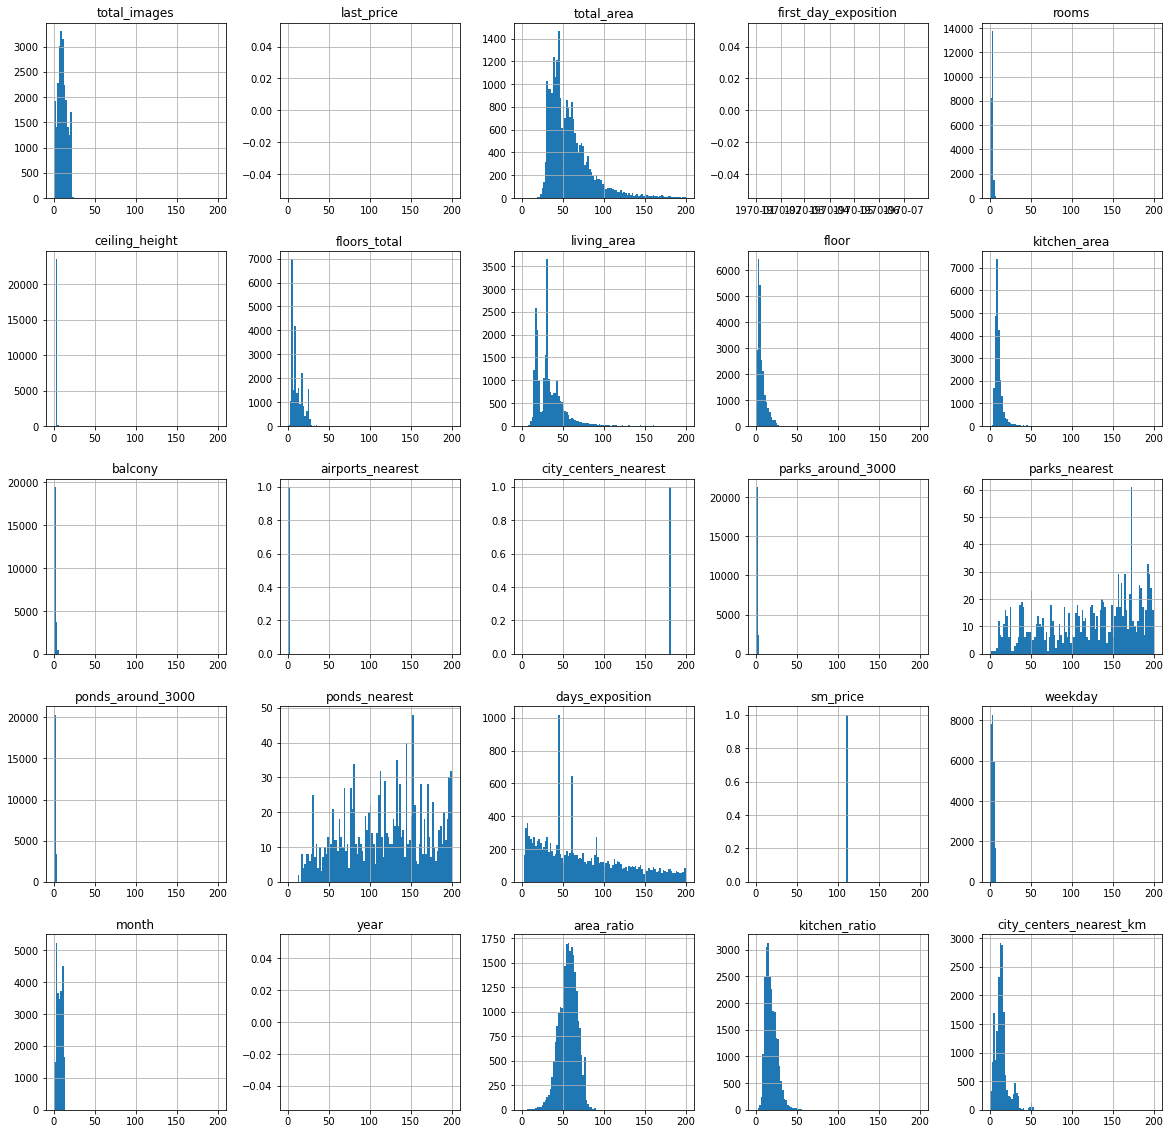

In [57]:
data.hist(bins=100, range=(0, 200), figsize=(20, 20))

Необходимые столбцы добавлены, приступаем к исследовательскому анализу данных.

### Проведём исследовательский анализ данных

In [58]:
def display_params(column, title, xlabel, ylabel):
    # Рассчитаем Q1, Q3 и IQR чтобы построить график без выбросов
    q1 = data[column].quantile(.25) # первый квартиль Q1
    q3 = data[column].quantile(.75) # третий квартиль Q3
    iqr = q3 - q1 # межквартильный размах IQR

    # Построим гистограмму площади
    data[column].hist(bins=30, range=((q1 - 1.5 * iqr), (q3 + 1.5 * iqr)), figsize=(10, 8), ec='black', legend=True)
    plt.title(title)
    plt.xlabel(xlabel)
    plt.ylabel(ylabel)
    plt.show()

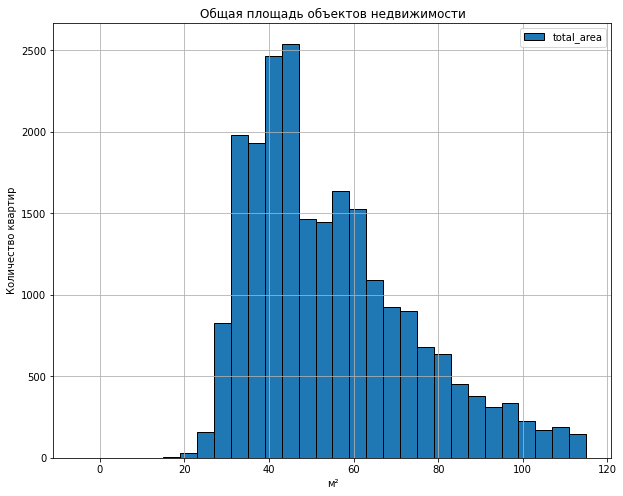

In [59]:
display_params('total_area', 'Общая площадь объектов недвижимости', 'м²', 'Количество квартир')

In [60]:
data['total_area'].describe()

count    23699.000000
mean        60.506040
std         35.545659
min         14.000000
25%         40.000000
50%         52.000000
75%         70.000000
max        900.000000
Name: total_area, dtype: float64

*Рассматриваемый диапазон до примерно 115 м², исключая выбросы. Большая часть объектов недвижимости имеют площадь от 30 до 65 м². Самый распространенный вариант - около 45 м². Площадь объектов более 100 м² встречается редко. С площадью меньше 30 м² также редкость. Среднее значение равно 60 м², а медиана 52 м² сдвинуты в сторону больших значений. Их не так много, но график получается растянутым.*

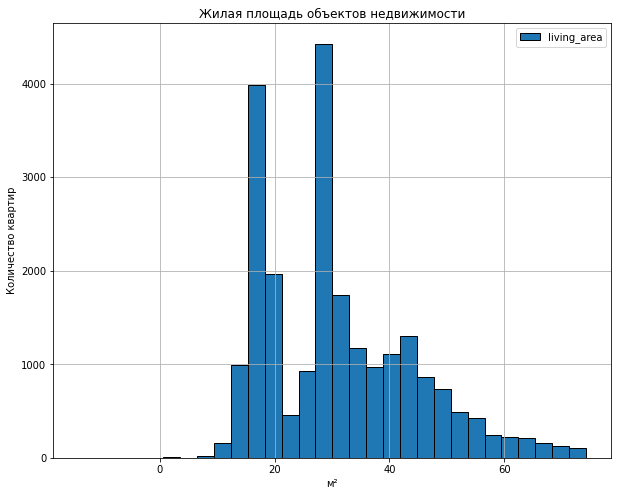

In [61]:
display_params('living_area', 'Жилая площадь объектов недвижимости', 'м²', 'Количество квартир')

In [62]:
data['living_area'].describe()

count    23699.000000
mean        34.099892
std         21.162096
min          2.000000
25%         19.000000
50%         30.000000
75%         41.100000
max        409.700000
Name: living_area, dtype: float64

*Рассматриваемый диапазон до примерно 78 м², исключая выбросы. Большая часть объектов недвижимости имеют жилую площадь от 15 до 35 м². Самый распространенные варианты - около 15 м² (комнаты/студии) и около 30 м² (однокомнатные квартиры). Жилая площадь объектов более 60 м² встречается редко. С площадью меньше 15 м² также редкость. Среднее значение равно 34 м², а медиана 30 м². У графика также наблюдается "хвост" из-за редких, но больших значений.*

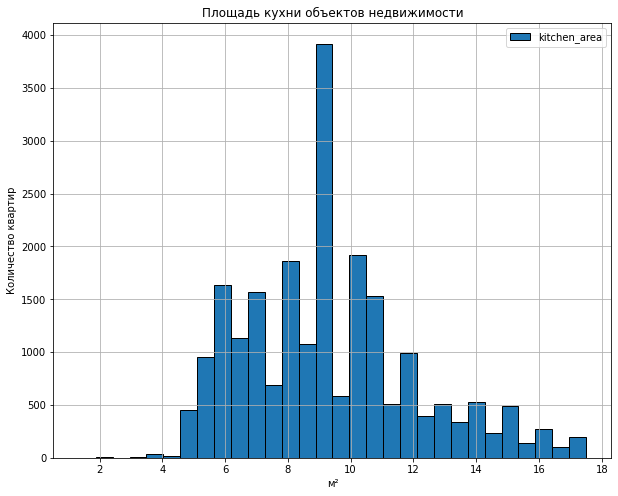

In [63]:
display_params('kitchen_area', 'Площадь кухни объектов недвижимости', 'м²', 'Количество квартир')

In [64]:
data['kitchen_area'].describe()

count    23699.000000
mean        10.428526
std          5.631126
min          1.300000
25%          7.400000
50%          9.100000
75%         11.440000
max        112.000000
Name: kitchen_area, dtype: float64

*Рассматриваемый диапазон до примерно 19 м², исключая выбросы. Большая часть объектов недвижимости имеют площадь кухни от 5 до 12 м². Самый распространенный вариант - около 9 м². Площадь кухни более 13 м² встречается редко. Площадь кухни менее 5 м² также редкость. Среднее значение равно 10,5 м², а медиана 9,1 м². У графика также наблюдается небольшой "хвост" из-за редких, но больших значений.*

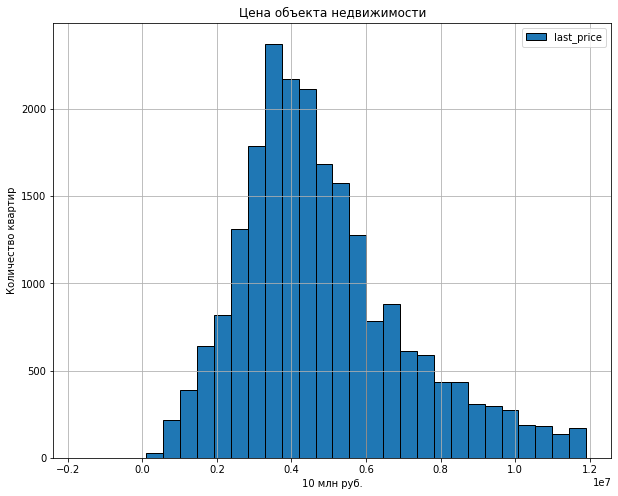

In [65]:
display_params('last_price', 'Цена объекта недвижимости', '10 млн руб.', 'Количество квартир')

In [66]:
data['last_price'].describe()

count    2.369900e+04
mean     6.541549e+06
std      1.088701e+07
min      1.219000e+04
25%      3.400000e+06
50%      4.650000e+06
75%      6.800000e+06
max      7.630000e+08
Name: last_price, dtype: float64

*Рассматриваем диапазон до примерно 12 млн руб., исключая выбросы. Большинство объектов недвижимости имеют цену в пределах от 3 до 5 млн. руб. Самый распространенный вариант - около 3.5 млн.руб.. Вариантов с ценой более 10 млн немного. Среднее значение равно 6,5 млн, а медиана 4,65 млн. У графика также наблюдается небольшой "хвост" из-за редких, но больших значений.*

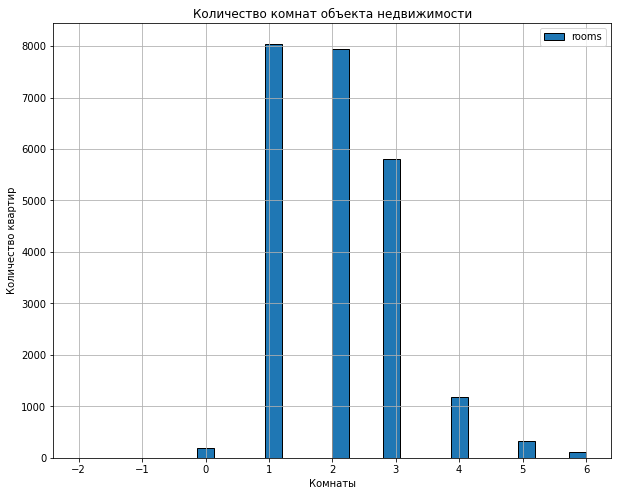

In [67]:
display_params('rooms', 'Количество комнат объекта недвижимости', 'Комнаты', 'Количество квартир')

In [68]:
data['rooms'].describe()

count    23699.000000
mean         2.070636
std          1.078405
min          0.000000
25%          1.000000
50%          2.000000
75%          3.000000
max         19.000000
Name: rooms, dtype: float64

*Рассматриваемый диапазон до 6 комнат, исключая некорректные значения (0 комнат) и выбросы. Большая часть объектов недвижимости имеют 1 или 2 комнаты, чуть меньше - 3 комнаты. Объектов, с кол-вом комнат 4-5 относительно немного. Среднее и медиана 2 комнаты точны. Крайне редкие значения (от 6 до 19 комнат) не оказывают существенного влияния на среднее значение.*

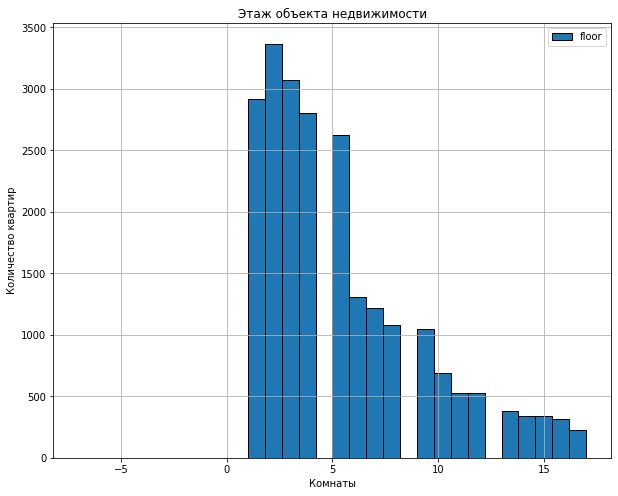

In [69]:
display_params('floor', 'Этаж объекта недвижимости', 'Комнаты', 'Количество квартир')

In [70]:
data['floor'].describe()

count    23699.000000
mean         5.892358
std          4.885249
min          1.000000
25%          2.000000
50%          4.000000
75%          8.000000
max         33.000000
Name: floor, dtype: float64

*Рассматриваемый диапазон до 17 этажей. Основная масса продаваемых квартир находит в диапазоне до 7 этажа. Значит в старых постройках квартир продаётся больше, чем в навых. Среднее значение равно 6 этаж, а медиана 4 этаж*

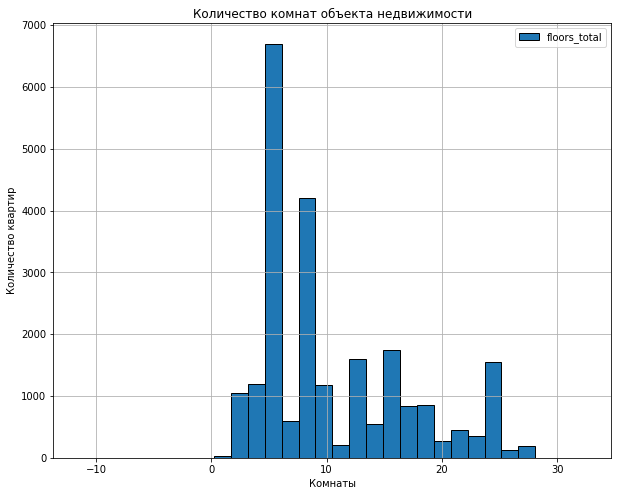

In [71]:
display_params('floors_total', 'Количество комнат объекта недвижимости', 'Комнаты', 'Количество квартир')

In [72]:
data['floors_total'].describe()

count    23699.000000
mean        10.678678
std          6.591239
min          1.000000
25%          5.000000
50%          9.000000
75%         16.000000
max         60.000000
Name: floors_total, dtype: float64

*Рассматриваемый диапазон до 27 этажей. Основная масса домов находит в диапазоне до 10 этажей. Значит старые постройки привелируют над новыми. Среднее значение равно 11 этажей, а медиана 9 этажей. Это соответствует типа панельных домов до 12 этажей включительно.*

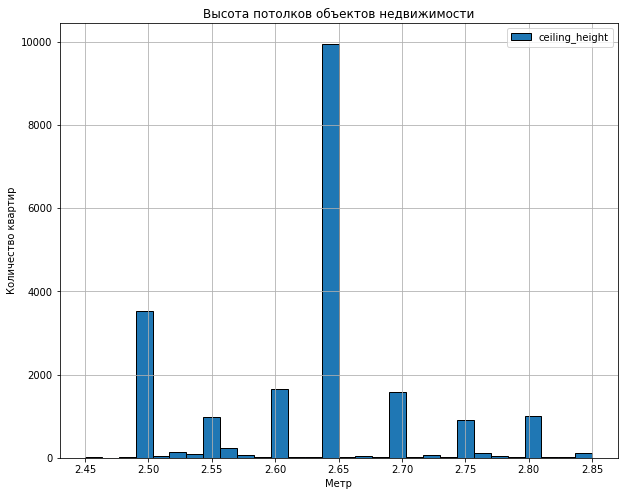

In [73]:
display_params('ceiling_height', 'Высота потолков объектов недвижимости', 'Метр', 'Количество квартир')

In [74]:
data['ceiling_height'].describe()

count    23699.000000
mean         2.724358
std          0.988298
min          1.000000
25%          2.600000
50%          2.650000
75%          2.700000
max        100.000000
Name: ceiling_height, dtype: float64

*Рассматриваем диапазон от 2,45 до 2,85 м, исключая некорректные значения и выбросы. Большинство объектов недвижимости имеют высоту потолков 2,5 м и 2,65 м (большинство). Реже представлены варианты от 2,7 м до 2,85 м. Среднее значение равно 2,7 м, а медиана 2,65. Это также подтверждает идею о привелировании в данных старых домов, так как в новых домах потолки часто выше 3 метров.*

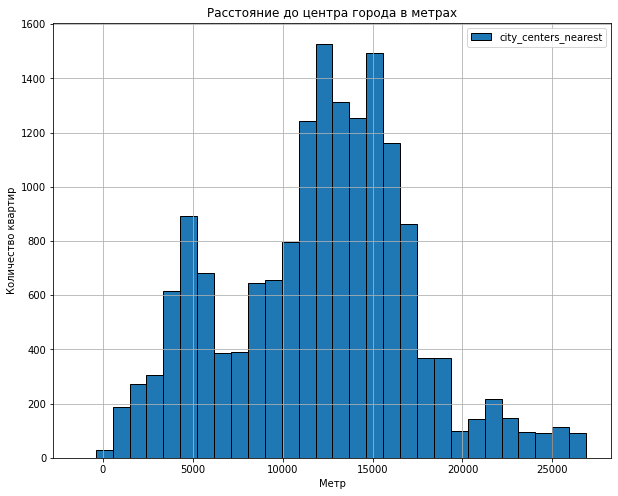

In [75]:
display_params('city_centers_nearest', 'Расстояние до центра города в метрах', 'Метр', 'Количество квартир')

In [76]:
data['city_centers_nearest'].describe()

count    18180.000000
mean     14191.277833
std       8608.386210
min        181.000000
25%       9238.000000
50%      13098.500000
75%      16293.000000
max      65968.000000
Name: city_centers_nearest, dtype: float64

*Рассматриваемый диапазон от 0 до 27000 м, исключая некорректные значения и выбросы. Большинство объектов недвижимости расположены на удалении 10-17 км от центра. Остальные варианты представлены реже. Среднее значение равно 14 км, а медиана 13,1 км. Показанный диапазон соответствует основной массе жилых построек в Санкт-Петербурге. *

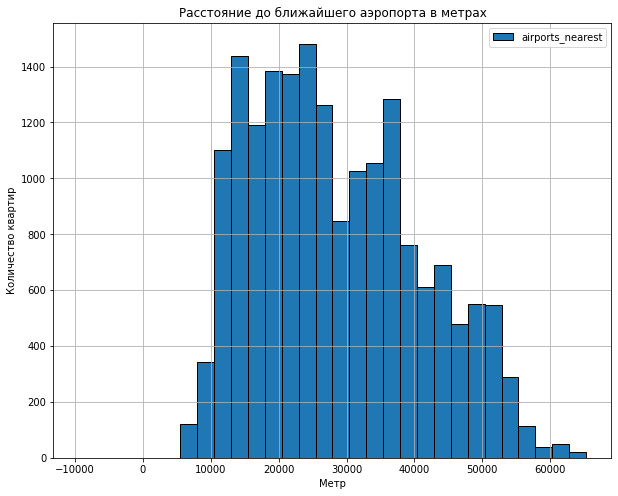

In [77]:
display_params('airports_nearest', 'Расстояние до ближайшего аэропорта в метрах', 'Метр', 'Количество квартир')

In [78]:
data['airports_nearest'].describe()

count    18157.000000
mean     28793.672193
std      12630.880622
min          0.000000
25%      18585.000000
50%      26726.000000
75%      37273.000000
max      84869.000000
Name: airports_nearest, dtype: float64

*Рассматриваемый диапазон с 0 до 65000 м. Большинство объектов недвижимости расположены на удалении от аэропорта на расстоянии 10-38 км. Ближайший к аэропорту объект на расстоянии 6,5 км. Среднее значение равно 28,8 км, а медиана 26,7 км. Данные соответствуют действительности. Так как аэропорт расположен за городом, то и расстояние до основной массы жилых построек значительное.*

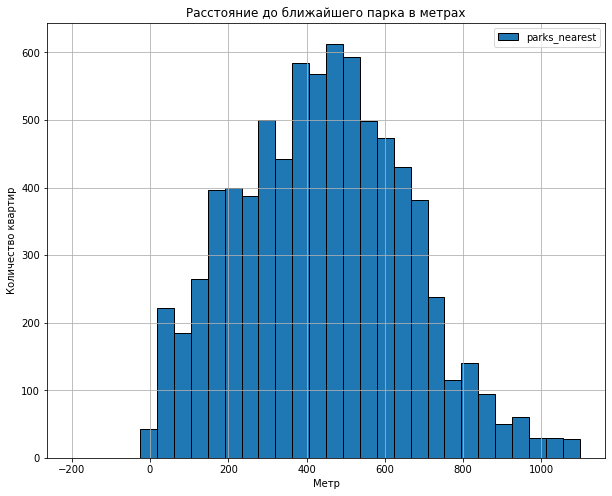

In [79]:
display_params('parks_nearest', 'Расстояние до ближайшего парка в метрах', 'Метр', 'Количество квартир')

In [80]:
data['parks_nearest'].describe()

count    8079.000000
mean      490.804555
std       342.317995
min         1.000000
25%       288.000000
50%       455.000000
75%       612.000000
max      3190.000000
Name: parks_nearest, dtype: float64

*Рассматриваемый диапазон с 0 до 1100 м. Большинство объектов недвижимости расположены на удалении от ближайшего парка на расстоянии 300-550м. Среднее значение равно 490 м, а медиана 455м. Видимо под парками понимаются также и любые небольшие скверы или зеленые засаждения.*

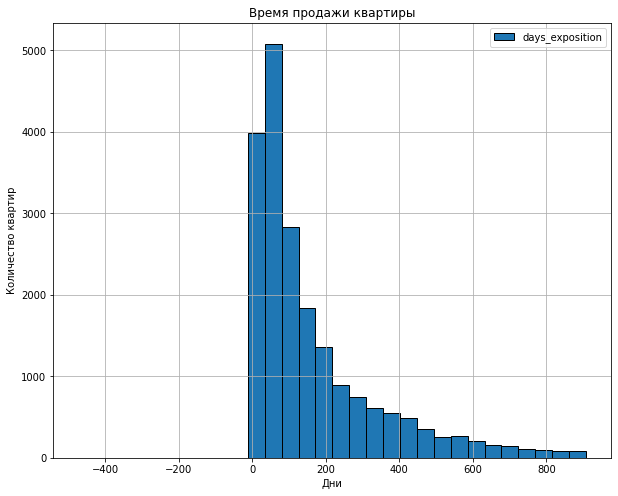

In [81]:
display_params('days_exposition', 'Время продажи квартиры', 'Дни', 'Количество квартир')

In [82]:
data['days_exposition'].describe()

count    23699.000000
mean      1498.725347
std       3353.244157
min          1.000000
25%         45.000000
50%        124.000000
75%        390.000000
max       9999.000000
Name: days_exposition, dtype: float64

*В основном квартиры продаются за срок в 100 дней. Есть большое число квартир, проданных всего за несколько дней после публикации. А также есть варианты, которые продавались несколько десятков месяцев. Среднее значение равно 1498 дней, что достаточно много. Видно влияние выбросов. Медиана же показывает реальную картину в 124 дня или примерно 4 месяца. Существуют и выбросы - самый большой равен 9999 дней, а самой быстрой продажей считается продажа за 1 день.*

*Создаём функцию для заполнения нового столбца с типом этажа:*

In [83]:
def floor_group(row):
    if row['floor'] == 1:
        return 'первый'
    elif row['floor'] == row['floors_total']:
        return 'последний'
    else:
        return 'другой'

In [84]:
# Добавляем столбец с типом этажа квартиры
data['floor_type'] = data.apply(floor_group, axis=1)

In [85]:
data['floor_type'].describe()

count      23699
unique         3
top       другой
freq       17404
Name: floor_type, dtype: object

In [86]:
# Посчитаем количество этажей в каждом типе
data['floor_type'].value_counts()

другой       17404
последний     3378
первый        2917
Name: floor_type, dtype: int64

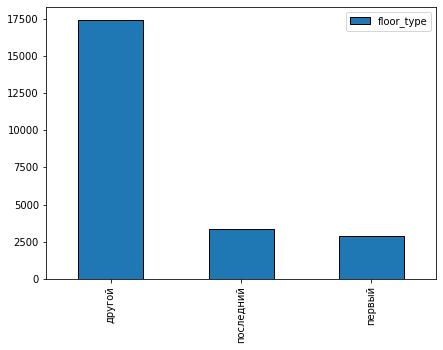

In [87]:
# Отобразим на графике
data['floor_type'].value_counts().plot.bar(figsize=(7, 5), ec='black', legend=True)
plt.show()

*Видно, что объекты недвижимости, расположенные на первом и последним этажах имеют примерно одинаковые значения и их доля не столь велика. В основном объекты расположены на этажах между первым и последним. Отличие большое, что говорит об относительно немалой этажности домов в Питере.*

In [88]:
# Создаем сводную таблицу
pivot_table_floor_type = data.pivot_table(index = 'floor_type', values = 'last_price', aggfunc = ['mean', 'count', 'median'])
# Присваиваем названия колонкам
pivot_table_floor_type.columns = ['mean', 'count', 'median']

<AxesSubplot:xlabel='floor_type'>

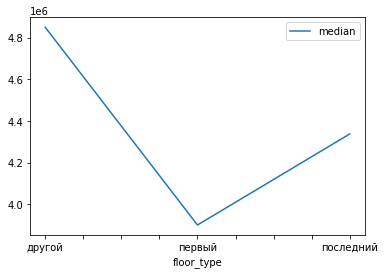

In [89]:
# Выведем график
pivot_table_floor_type.plot(y = 'median', legend=True)

In [90]:
#Выведем таблицу
pivot_table_floor_type

,mean,count,median
floor_type,,,
другой,6.676894e+06,17404,4850000
первый,4.803560e+06,2917,3900000
последний,7.345032e+06,3378,4337500


*Из графика видно, что медианное значение для квартир на первом этаже минимальное. Максимальное медианное значение стоимости квартир - для квартир отличных от первого и последнего этажа. Чего и следовало ожидать от такого количества квартир не на первом или последнем этажах. *

*Посчитаем среднюю цену одного квадратного метра в 10 населённых пунктах с наибольшим числом объявлений*

In [91]:
top_10 = data['locality_name'].value_counts().head(10)
top_10 

Санкт-Петербург    15721
Мурино               590
Кудрово              472
Шушары               440
Всеволожск           398
Пушкин               369
Колпино              338
Парголово            327
Гатчина              307
Выборг               237
Name: locality_name, dtype: int64

In [92]:
# Выведем среднюю цену за кв м по топ 10 населенным пунктам
top_10_pivot = data.query('locality_name in @top_10.index').pivot_table(index='locality_name', 
                                                            values='sm_price').sort_values(by='sm_price', ascending=False)
top_10_pivot

,sm_price
locality_name,
Санкт-Петербург,114419.275428
Пушкин,103028.086721
Кудрово,94303.161017
Парголово,90033.155963
Мурино,84420.991525
Шушары,78291.559091
Колпино,75291.647929
Гатчина,68590.413681
Всеволожск,68350.339196


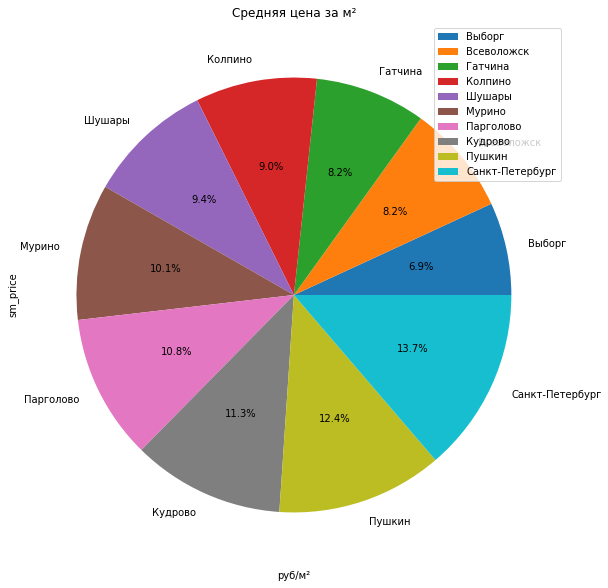

In [93]:
# Отобразим на графике среднюю цену квадратного метра в топ 10 населенных пунктах в процентном соотношении
top_10_pivot.sort_values(by='sm_price').plot(kind='pie', autopct='%1.1f%%', figsize=(10, 10), subplots=True)
plt.title('Средняя цена за м²')
plt.xlabel('руб/м²')
plt.show()

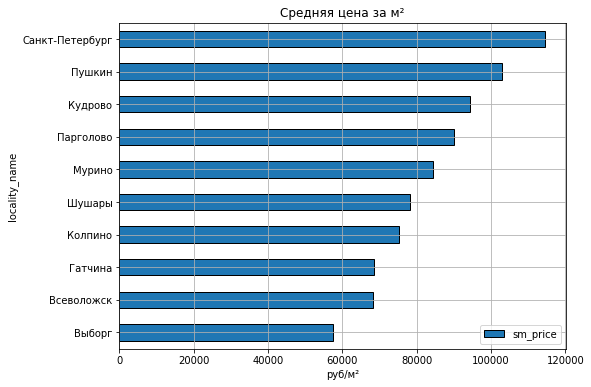

In [94]:
# Отобразим на графике среднюю цену квадратного метра в топ 10 населенных пунктах в рублях на метр квадратный
top_10_pivot.sort_values(by='sm_price').plot(kind='barh', legend=True, grid=True, ec='black', figsize=(8, 6))
plt.title('Средняя цена за м²')
plt.xlabel('руб/м²')
plt.show()

*Из графиков видно, что наибольшая средняя цена за 1 квадратный метр в Санкт-Петербурге(114419 руб.) - самый крупный и развитый город региона. Следом по стоимости идет Пушкин(103028 руб.), что тоже логично - много исторических мест, парков и расположен к Петербургу ближе, чем, например, Гатчина или Шушары. Наименьшая цена за квадратный метр в Выборге (57464 руб.).*

*Определение факторов, влияющих на стоимость квартиры:*

In [95]:
# Создадим список с параметрами для проверки
corr_param = [
    'last_price',
    'total_area',
    'rooms',
    'city_centers_nearest',
    'weekday',
    'month',
    'year']

In [96]:
# Список с названиями параметров
corr_labels = [
    'Стоимость квартиры',
    'Общая площадь квартиры',
    'Количество комнат',
    'Расстояние\nдо центра города',
    'Публикация объявления\nдень',
    'Публикация объявления\nмесяц',
    'Публикация объявления\nгод']

# Получаем матрицу корреляции
corr_matrix = data[corr_param].corr()

# Выведем на экран
display(corr_matrix)

,last_price,total_area,rooms,city_centers_nearest,weekday,month,year
last_price,1.000000,0.654308,0.363343,-0.206747,0.001550,0.002779,-0.043089
total_area,0.654308,1.000000,0.756220,-0.232231,-0.004503,0.004637,-0.079285
rooms,0.363343,0.756220,1.000000,-0.184864,-0.004134,-0.004469,-0.055418
city_centers_nearest,-0.206747,-0.232231,-0.184864,1.000000,0.008883,-0.008978,0.032333
weekday,0.001550,-0.004503,-0.004134,0.008883,1.000000,0.011496,-0.004799
month,0.002779,0.004637,-0.004469,-0.008978,0.011496,1.000000,-0.269642
year,-0.043089,-0.079285,-0.055418,0.032333,-0.004799,-0.269642,1.000000


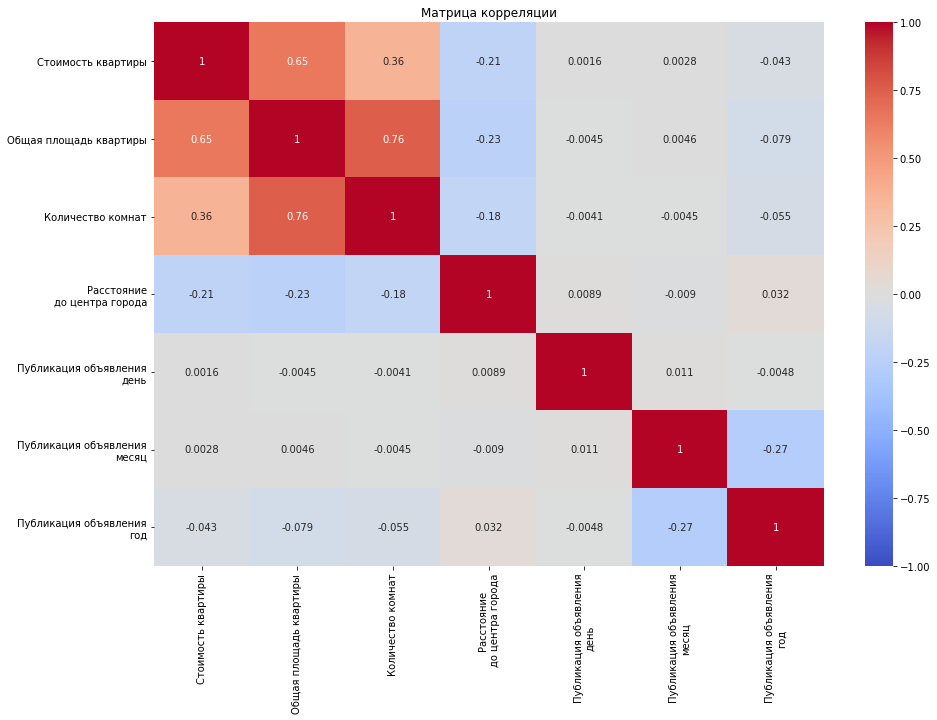

In [97]:
# Визуализируем матрицу корреляции
plt.figure(figsize=(15, 10))
sns.heatmap(corr_matrix, vmin=-1, vmax=1,
            cmap='coolwarm', annot=True,
            yticklabels=corr_labels,
            xticklabels=corr_labels)
plt.title('Матрица корреляции')
plt.show()

*Вывод:*

*Видно, что наибольшая положительная линейная связь между стоимостью квартиры и ее площадью. Зависимость прямопропорциональная - чем больше стоимость квартиры, тем больше ее площадь и наоборот. Положительная линейная связь отмечается также между стоимостью квартиры и количеством комнат, хотя она и меньше. Связь отличается примерно в 2 раза от связи между стоимостью квартиры и площадтю. Соответственно, чем количество комнат больше, тем больше стоимость квартиры в том числе, хотя, если две квартиры имеют одинаковую площадь, но разное количество комнат, то это может незначительно сказаться на цене. Слабую отрициательную линейную связь можно заметить между стоимостью квартиры и расстоянием до центра города. Чем меньше расстояние до центра, тем больше стоимость квартиры. Между стоимостью квартиры и днем недели, месяцем или годом размещения объявления также практически отсутствует линейная связь.*

*Рассмотрим корреляции более детально на графиках:*

In [98]:
# Построим общую функцию зависимости цены от разных параметров
def price_dependency(xcolumn, ycolumn, kind, style, title, xlabel, ylabel):
    data.plot(x=xcolumn, y=ycolumn, kind=kind, style=style, figsize=(8, 6), legend=True, alpha = 0.1)

    plt.title(title)
    plt.xlabel(xlabel)
    plt.ylabel(ylabel)
    plt.ylim(0, 100000000)
    plt.tight_layout()
    plt.show()

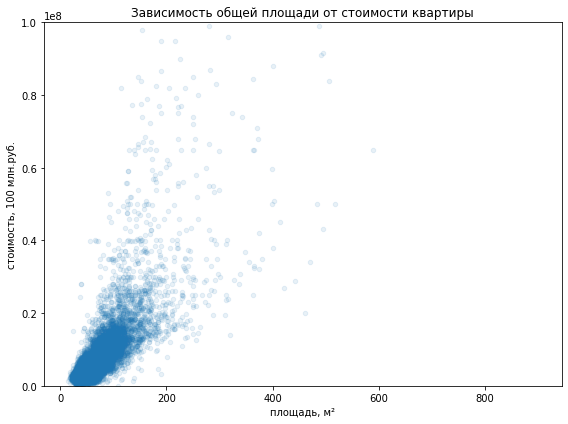

In [99]:
price_dependency('total_area', 'last_price', 'scatter', '', 'Зависимость общей площади от стоимости квартиры', 
                 'площадь, м²', 'стоимость, 100 млн.руб.')

*Видим, что больше всего данных для квартир стоимостью до 18 млн. руб. и площадью до 120 кв.м. Зависимость прямопропорциональная - чем больше площадь квартиры, тем выше цена. Все хотят площадь больше, а спрос порождает предложение.*

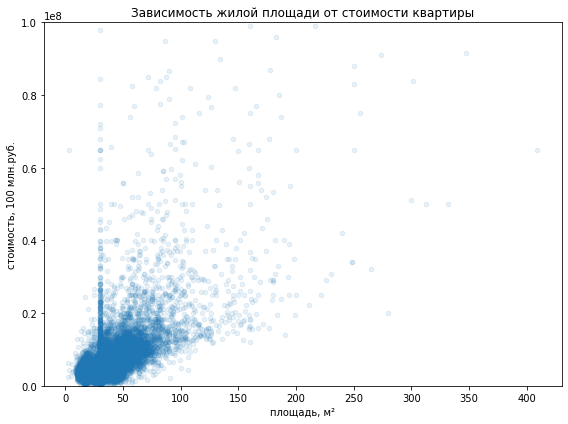

In [100]:
price_dependency('living_area', 'last_price', 'scatter', '', 'Зависимость жилой площади от стоимости квартиры', 
                 'площадь, м²', 'стоимость, 100 млн.руб.')

*Видим, что больше всего данных для квартир стоимостью до 18 млн. руб. и жило площадью до 75 м². Зависимость прямопропорциональная - чем больше жилая площадь квартиры, тем выше ее стоимость.*

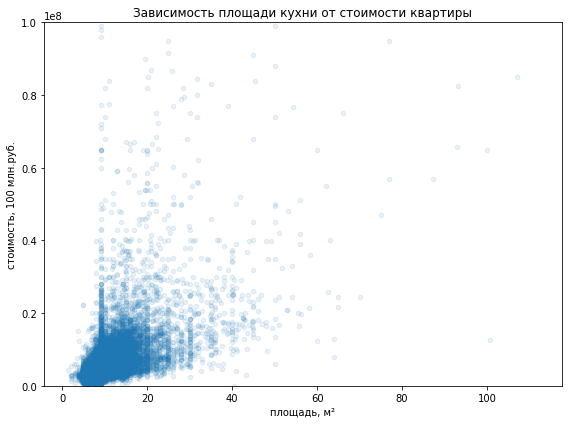

In [101]:
price_dependency('kitchen_area', 'last_price', 'scatter', '', 'Зависимость площади кухни от стоимости квартиры', 
                 'площадь, м²', 'стоимость, 100 млн.руб.')

*Видим, что больше всего данных для квартир стоимостью до 18 млн. руб. и площадью кухни до 18-20 м². Зависимость прямопропорциональная - чем больше площадь кухни, тем выше ее стоимость, как и общая стоимость квартиры. Что логично. Вряд ли кто-то будет покупать большую квартиру с небольшой кухней в наше время, как было в старых домах.*

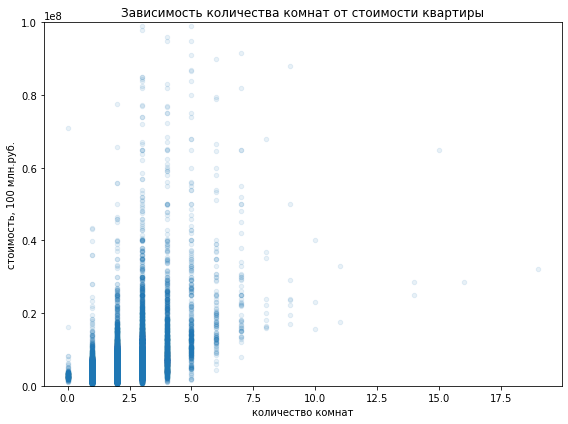

In [102]:
price_dependency('rooms', 'last_price', 'scatter', 'o', 'Зависимость количества комнат от стоимости квартиры', 
                 'количество комнат', 'стоимость, 100 млн.руб.')

*Видим, что больше всего данных для квартир стоимостью до 18 млн. руб и кол-вом комнат от 1 до 3. Для этого диапазона: с учеличение числа комнат до 3 комнат стоимость квартир растет, от 3 до 4 - цена примерно одинаковая, для 5 комнат стоимость снижается. Это можно объяснить тем, что в старом фонде есть 5-ти комнатные квартиры с маленькой площадью комнат.*

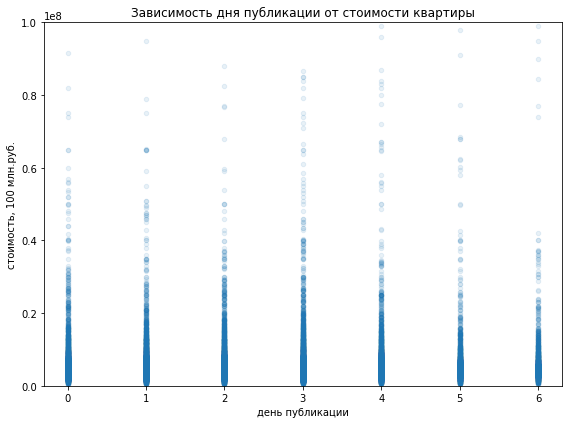

In [103]:
price_dependency('weekday', 'last_price', 'scatter', 'o', 'Зависимость дня публикации от стоимости квартиры', 
                 'день публикации', 'стоимость, 100 млн.руб.')

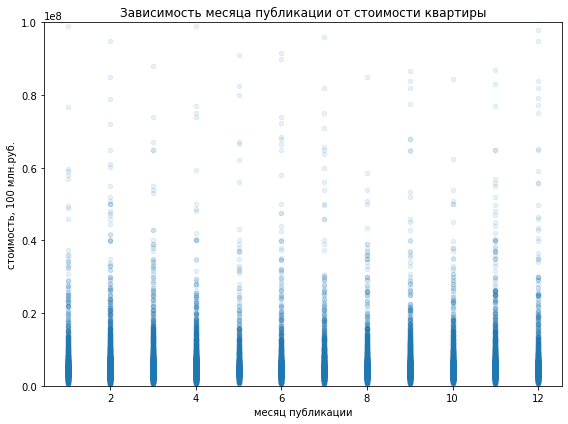

In [104]:
price_dependency('month', 'last_price', 'scatter', 'o', 'Зависимость месяца публикации от стоимости квартиры', 
                 'месяц публикации', 'стоимость, 100 млн.руб.')

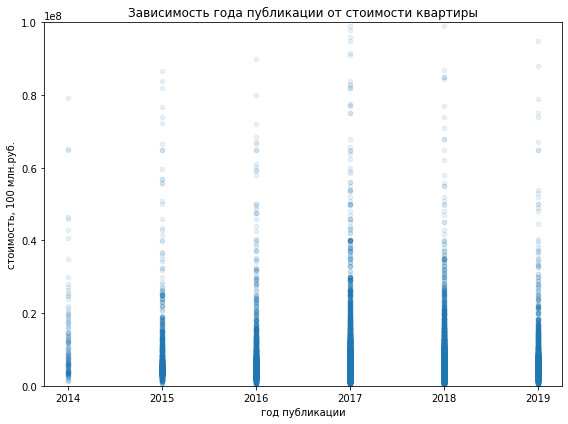

In [105]:
price_dependency('year', 'last_price', 'scatter', 'o', 'Зависимость года публикации от стоимости квартиры', 
                 'год публикации', 'стоимость, 100 млн.руб.')

*Зависимоть между датой размещения объявления (день недели, месяц, год) и стоимостью квартир отсутствует. Также из ранее построенной матрицы корреляции видно, что Коэффициенты корреляции отрицательные и близки к нулю.*

*Рассмотрим цену за 1 кв.м. и расстояние до центра:*

In [106]:
# Создадим датасет только для Санкт-Петербурга
petersburg = data.query('locality_name == "Санкт-Петербург"')

[Text(0.5, 0, 'Удаленность, м'), Text(0, 0.5, 'Цена 1 кв.м.')]

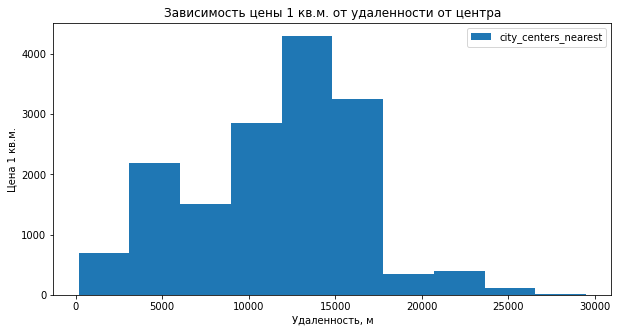

In [107]:
# Построим диаграмму рассеяния (цена и удаленность от центра) для Санкт-Петербурга
petersburg.plot(x='sm_price', y='city_centers_nearest', kind='hist',
                       title='Зависимость цены 1 кв.м. от удаленности от центра', figsize=(10,5)).set(
                       xlabel='Удаленность, м', ylabel='Цена 1 кв.м.')

*Уровень корреляции, рассчитанный по всему массиву стоимости квадратного метра и площади квартиры составил -35%, т.е. некоторая общая обратная зависимость прослеживается. Как видно из диаграммы, у квартир, находящихся в радиусе до 25 км.от центра, верхняя граница стоимости кв.метра обратно пропорциональна удалению от центра, далее у верхней границы цены также можно проследить падение после второго незначительного пика в районе 23 км.* 

*Построим матрицу и тепловую карту по всем нашим данным*

In [108]:
phik_overview = data.phik_matrix()
phik_overview

interval columns not set, guessing: ['total_images', 'last_price', 'total_area', 'rooms', 'ceiling_height', 'floors_total', 'living_area', 'floor', 'kitchen_area', 'balcony', 'airports_nearest', 'city_centers_nearest', 'parks_around_3000', 'parks_nearest', 'ponds_around_3000', 'ponds_nearest', 'days_exposition', 'sm_price', 'weekday', 'month', 'year', 'area_ratio', 'kitchen_ratio', 'city_сenters_nearest_km']


/opt/conda/lib/python3.9/site-packages/phik/data_quality.py:59: UserWarning: The number of unique values of variable first_day_exposition is large: 1491. Are you sure this is not an interval variable? Analysis for pairs of variables including first_day_exposition can be slow.
  warnings.warn(


,total_images,last_price,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor,is_apartment,...,ponds_nearest,days_exposition,sm_price,weekday,month,year,area_ratio,kitchen_ratio,city_сenters_nearest_km,floor_type
total_images,1.000000,0.022400,0.097727,0.000000,0.125160,0.000000,0.066692,0.159818,0.069380,0.000000,...,0.017089,0.134986,0.065472,0.021538,0.050892,0.173550,0.032550,0.075875,0.047511,0.043012
last_price,0.022400,1.000000,0.598042,0.201049,0.532317,0.000000,0.000000,0.522938,0.044343,0.006885,...,0.046111,0.000000,0.779819,0.010967,0.000000,0.021242,0.121309,0.091171,0.081264,0.038640
total_area,0.097727,0.598042,1.000000,0.000000,0.757943,0.000000,0.065001,0.803610,0.072787,0.052594,...,0.077367,0.113599,0.447442,0.014843,0.005083,0.066841,0.345107,0.322455,0.266535,0.076938
first_day_exposition,0.000000,0.201049,0.000000,1.000000,0.740610,0.000000,0.000000,0.172755,0.000000,0.000000,...,0.363119,0.834506,0.000000,1.000000,1.000000,1.000000,0.159338,0.092296,0.310207,0.095905
rooms,0.125160,0.532317,0.757943,0.740610,1.000000,0.000000,0.191272,0.843531,0.203012,0.000000,...,0.048797,0.147677,0.156181,0.017568,0.012820,0.095131,0.504679,0.683185,0.337249,0.106586
ceiling_height,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.031324,0.000000,0.000000,0.126258,...,0.000000,0.017107,0.179419,0.000000,0.011855,0.000000,0.000000,0.101521,0.000000,0.003599
floors_total,0.066692,0.000000,0.065001,0.000000,0.191272,0.031324,1.000000,0.086100,0.609325,0.022345,...,0.190666,0.120774,0.047003,0.000000,0.033625,0.046051,0.281079,0.275932,0.376540,0.486162
living_area,0.159818,0.522938,0.803610,0.172755,0.843531,0.000000,0.086100,1.000000,0.089145,0.092578,...,0.068027,0.135692,0.298306,0.022604,0.000000,0.107629,0.350453,0.480598,0.345547,0.069928
floor,0.069380,0.044343,0.072787,0.000000,0.203012,0.000000,0.609325,0.089145,1.000000,0.000000,...,0.113138,0.058663,0.000000,0.005150,0.033133,0.036367,0.264533,0.267661,0.318315,0.454155
is_apartment,0.000000,0.006885,0.052594,0.000000,0.000000,0.126258,0.022345,0.092578,0.000000,1.000000,...,0.044966,0.019188,0.065214,0.000000,0.017950,0.020552,0.048277,0.044600,0.093688,0.008015


<AxesSubplot:>

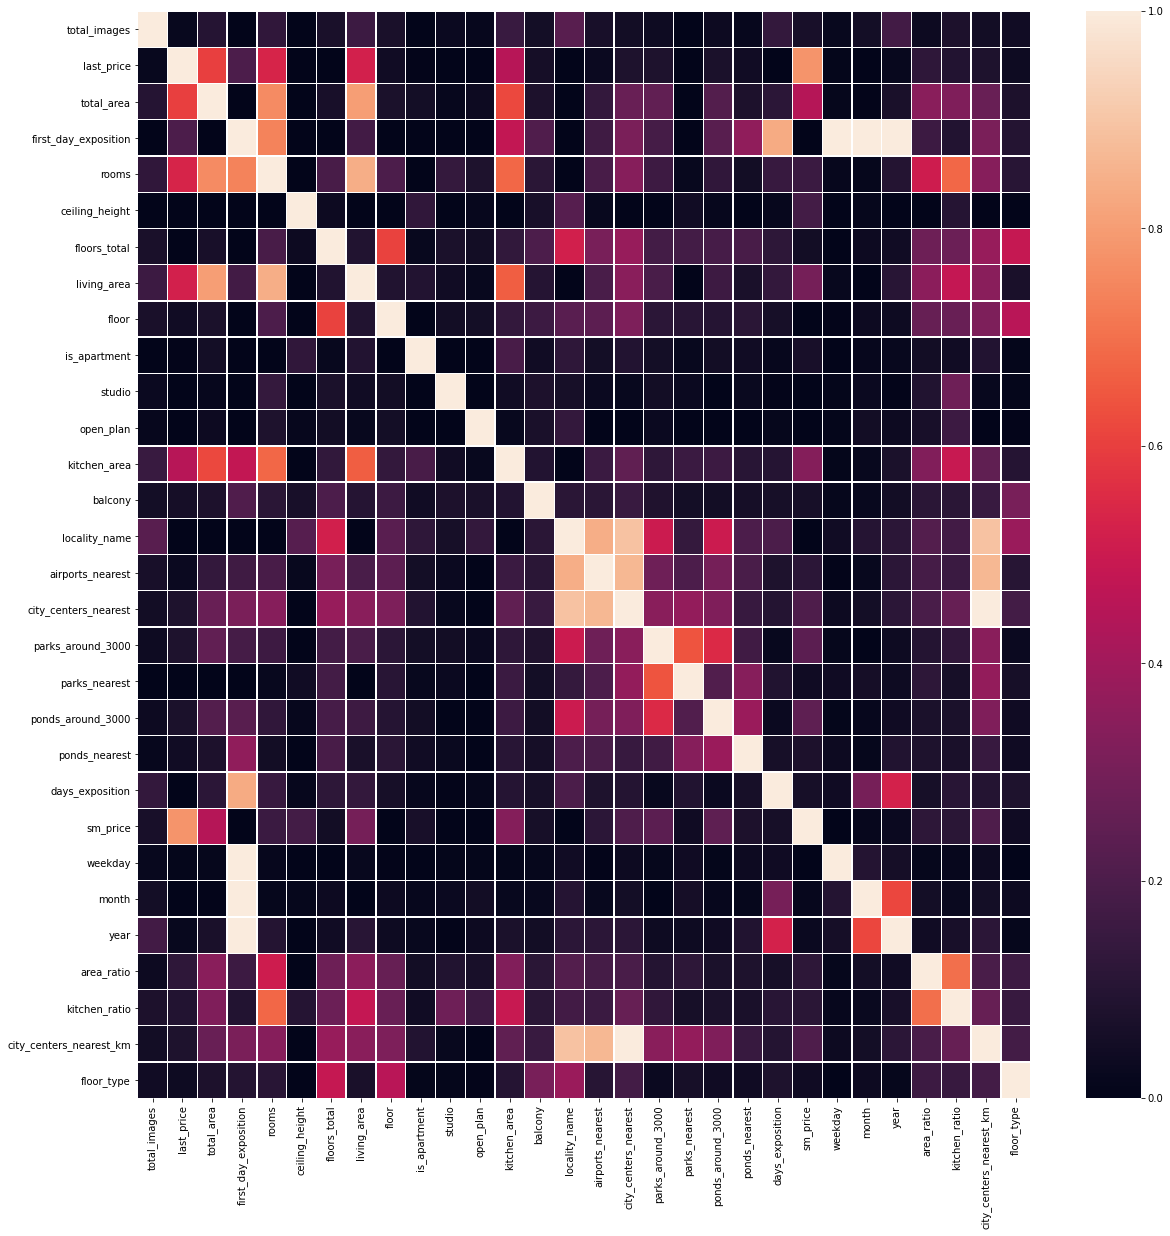

In [109]:
fig, ax = plt.subplots(figsize=(20, 20))
sns.heatmap(phik_overview, linewidths= .3)

### Общий вывод

**Проделанные работы:**
* Была получена первоначальная информация по датасету.

* Обнаружены пропуски в датасете, кол-во некоторых доходит до 88.29%. Кол-во столбцов с пропусками 14 (всего в датасете 22 столбца).Явных дубликатов в датаесете не было обнаружено. Замечены аномалии, к примеру, минимальное значение потолка 1 метр, а максимальное 100 метров.

* Найдены пропуски, дубликаты и аномалии в датасете. Была проведена работа по заполнению пропусков, удаление ненужных строк из датасета. Аномалии и дубликаты обработаны.

* Заменены неявные дубликаты (раньше названия населенных пунктов повторялись из-за разной записи е-ё и так далее).Столбец с датой приведен к округленному до дней и правильному форматам. Пропуски в столбце с высотой потолков заменены на медиану, кол-во аномалий 75. Убраны пропуски в столбце living area, они составляли ~8 процентов от датасета. Замена на булев тип данных в столбцах, где это необходимо. Пропуски в kitchen area исправлены на значение равное 18% от общей площади квартиры, что является медианным значением. Пропуски в living area исправлены на значение равное 56.48% от общей площади квартиры, что является медианным значением.Удалены квартиры, которые продаются больше 500 дней, кол-во квартир от всего датасета составляет 7.37%.

* В датафрейм добавлены новые показатели

* Изучен фактор того, как быстро продавались квартиры

* Определены факторы, которые больше всего влияют на общую (полную) стоимость объекта

* Посчитана средняя цена одного квадратного метра в 10 населённых пунктах с наибольшим числом объявлений

* Выделены квартиры в Санкт-Петербурге с помощью столбца locality_name и вычислена их средняя стоимость на разном удалении от центра

**Исследовано следующее:**

**Площадь**

Большинство квартир - менее 100 квадратных метров, больше площадь практически не встречается. 
Чем больше площадь, тем выше стоимость. Корреляция этих параметров крайне высокая. Число комнат влияет на цену (больше комнат - больше цена), однако зависимость ниже, чем у площади. Можно сделать два вывода: бывают квартиры с большими по площади комнатами; квартиры в центре состоят из малого числа комнат, но стоят достаточно дорого.

**Стоимость**

В основном стоимость квартир - порядка 3-5 миллионов. 
Самые дорогие варианты квартир находятся в центре города, однако в центре также есть и достаточно дешёвые варианты.

Первый этаж непосредственно влияет на стоимость квартиры - в среднем квартиры на 1-м этаже значительно дешевле. Чуть дороже последний этаж. Наибольшая стоимость у квартир, расположенных не на 1-м и не на последнем этаже. Цена этих квартир также может зависеть от этажа, но на этот фактор будут наслаиваться еще и другие условия (вид из окна, качество жилья, район и тд).

Цена за квадрат выше у однокомнатных квартир и квартир с 4 и 5 комнатами. Последнее, вероятно, объясняется элитностью недвижимости. На отрезке от 130 кв.м. можно наблюдать небольшое уменьшение верхней границы стоимости 1 кв.м. С увеличением количества комнат (от 3 и более) цена уже не коррелирует с ценой так явно. На стоимость больше влияет площадь квартиры, нежели число комнат. Т.е. могут быть дорогие квартиры с малым числом комнат, но где комнаты просторные. Зависимость цены квартиры от числа комнат в центре такая же, как и в целом по городу.

В центральной зоне почти нет зависимости от удалённости от центра города. Стоимость даже немного повышается при удалении от центра - вероятно, это связано с расположением точки, которая является формальным центром города.
У квартир, находящихся в радиусе до 25 км от центра, верхняя граница стоимости кв.метра обратно пропорциональна удалению от центра, далее можно проследить падение верхней границы цены после незначительного пика в районе 25-35 км, и на расстоянии более 60 км стоимость падает значительно.

Зависимость цены от года, месяца и дня недели размещения объявления: Цена 1 кв.м. меняется в течение лет, но зависит не от года продажи, а от состояния макроэкономики. Таким образом, нельзя без дополнительной информации судить о тенденциях роста либо снижения цены. Тем не менее, можно отметить сезонность продаж: пик спроса и рост цены кв.метра приходится на весну и осень. Вероятнее всего влияние оказывает рост спроса на недвижимость после завершения года и после отпусков. В мае-июне спрос на жилье падает, возможно из-за массовых отпусков. Также максимум цены за 1 кв.м. приходится на среду, минимум- на пятницу и субботу. Разница в цене в результате колебаний составляет 0,02-0,04% и незначительна.

**Стоимость квадратного метра в топ-10 населённых пунктов**

Наибольшая средняя стоимость квадратного метра, как и ожидалось, в Санкт-Петербурге. Затем идёт Пушкин, что, вероятно, вызвано хорошей застройкой и большим количеством парков. Затем идут районы, фактически являющиеся Санкт-Петербургом и непосредственно к нему примыкающие. Из топ-10 наименьшая стоимость в Выборге, расположенный на большом расстоянии от Санкт-Петербурга. 

Факторы, влияющие на стоимость в центре Санкт-Петербурга:
    - В центре города практически нет разницы, насколько квартира удалена от условного центра города.
    - В центре города последний этаж практически не влияет на стоимость квартиры, в отличие от остального города.
    - В центре есть очень дорогие однокомнатные квартиры

**Комнаты**

В основном квартиры состоят из 1, 2 и 3 комнат. Есть небольшая доля 4-комнатных квартир. Варианты, где больше 7 комнат выглядят странно и подозрительно. 
В центре в два раза ниже доля однокомнатных квартир (16 %), чем в среднем по городу (32 %). Половина четырёхкомнатных квартир находится в центре города (52 %), их доля в два раза выше, чем в среднем по городу (6 %). Большинство квартир с 5 комнатами и более находятся в центре города.

**Высота потолков**

Большинство вариантов имеют высоту потолков от 2,45 до 2,85 метров. Больше 4 метров высота потолков может считаться выбросом. Есть значения в 27 метров (высота 9-этажного дома) - это может быть ошибкой данных и реальная высота 2,7 метра.

**Площадь кухни**

Самые распространённые кухни - от 5 до 12 метров. Больше 20 метров кухни практически не встречаются. Больше 30 - единичные случаи. Возможно это тип евродвушек/студий, когда комната объединена с кухней.

**Жилая площадь**

Рынок жилья представлен объектами общей площадью от 12 до 900 кв.м. В основном это жилье общей площадью от 15 до 100 кв.м. В жилой площади квартиры преобладает диапазон 15-35 кв.м. Это стандартные небольшие квартиры, которые очень распространены в наших городах и являются типичными для среднестатистической квартиры эконом-класса. 


**Время продажи**

Медианное время продажи - 124 дня. Среднее время продажи - 1498 дней.
Есть большое число квартир, проданных всего за несколько дней после публикации. А также есть варианты, которые продавались несколько десятков месяцев.
Быстрой продажей можно назвать срок в 45 дней и меньше (так как человеку нужно посмотреть разные варианты, сделать проверки квартиры, а если объект берется в ипотеку, то и оформить множество документов). Долгой продажей - 230 дней (7,5 месяцев) и дольше.

Корреляция ЦЕНА – ДЕНЬ НЕДЕЛИ

Четкой взаимосвязи между днем недели и ценой объекта нет, можно разве что утверждать, что в воскресенье цена на объект ниже, чем в любой другой день.

Корреляция ЦЕНА — ДЕНЬ МЕСЯЦА

Зависимости между ценой и днем публикации нет, данные сильно разнятся, четких закономерностей не обнаружено.

Корреляция ЦЕНА — МЕСЯЦ

Зависимость между месяцами и ценой объекта также не выявлена, но можно утверждать, что летом квартиры выставляются по меньшей цене, чем в остальные месяцы.

Корреляция ЦЕНА — ГОД

В 2016, 2017 и 2018 году цены на квартиры были гораздо ниже, чем в 2015 или в 2019 году. Корреляция не обнаружена между показателями "цена" и "год". Нет линейной зависимости. Чаще всего на данный пункт влияют как внутри-, так и внешнеполитические факторы.

**Общие выводы по характеристикам типичной квартиры:**
* Площадь от 30 до 70 метров
* 1-3 комнаты
* Потолки 2.5 - 3 метра 
* Располагается на 1-5 этаже
* В 5 или 9 этажной квартире
* Примерно в 10-17 км от центра города
* Минимум в 10-38 км от аэропорта
* В 300-550 м от парка
* Квартиры реже выкладывают на выходных и в праздничные месяцы (декабрь, январь, май)
* Самое активное время для публикации квартир – февраль-апрель
* Квартиры продаются в среднем за 95 дней, но есть и те, кто долго ждут продажи, поскольку среднее значение - 180 дней.
* В среднем, квартиры стоят около 5 млн. руб.
* На цену сильнее всего положительно влияют общая площадь квартиры (коэф.корр. 0.64), площадь жилого пространства (0.56), площадь кухни (0.44), количество комнат (0.4). Отрицательно влияет год постройки (-0.04): чем старее дом, тем дешевле.
* Дешевле всего квартиры выкладывают в мае-июне 
* В 14 году цены на жилье сильно выросли из-за инфляции около 20%, в связи с некоторыми событиями. Оценивать данные без поправки на ключевую ставку нелогично. С 2015 по 2019 ставка менялась с 11% до 6%, однако даже при падающей ставке цены росли с 2017 по 2019 год. 
* Из нашего списка больше всего объявлений в Санкт-Петербурге (15720 объявлений).
* Остальные топ 9 населенных пунктов имеют в среднем 350 объявлений.
* При этом самый дорогой метр квадратный в Санкт-Петербурге, а самый дешевый в Выборге.